<a href="https://colab.research.google.com/github/Vedanti0404/Deep-Learning/blob/main/Linear_regression_with_2_variables_on_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
# Display the first few rows of the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
# Print the shape of the dataset
print("Shape of the dataset:")
print(iris_df.shape)
# Select two features (for simplicity) and the target for regression
features = ['sepal length (cm)', 'sepal width (cm)']
target = 'target'
# Extract selected features and target
X = iris_df[features]
y = iris_df[target]
# Print the shape of the selected features and target
print("\nShape of selected features (X):")
print(X.shape)
print("\nShape of target (y):")
print(y.shape)


Shape of the dataset:
(150, 5)

Shape of selected features (X):
(150, 2)

Shape of target (y):
(150,)


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 2)
Shape of y_train: (120,)
Shape of X_test: (30, 2)
Shape of y_test: (30,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Create a simple neural network for regression
model = Sequential([
 Dense(10, input_dim=2, activation='relu'),
 Dense(1, activation='linear')
])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Print the model summary
print("Model Summary:")
model.summary()

Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.1)

Epoch 1/50
14/14 [==============================] - 1s 18ms/step - loss: 4.8625 - val_loss: 3.0569
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 2.6807 - val_loss: 1.5737
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 1.3699 - val_loss: 0.7748
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 0.6636 - val_loss: 0.4958
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 0.3996 - val_loss: 0.4374
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.3258 - val_loss: 0.4491
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 0.3057 - val_loss: 0.4608
Epoch 8/50
14/14 [==============================] - 0s 4ms/step - loss: 0.3006 - val_loss: 0.4620
Epoch 9/50
14/14 [==============================] - 0s 4ms/step - loss: 0.2959 - val_loss: 0.4571
Epoch 10/50
14/14 [==============================] - 0s 5ms/step - loss: 0.2910 - val_loss: 0.4526
Epoch 11/50
14/14 

In [ ]:
# Predictions on the test set
predictions = model.predict(X_test)
# Display original data points and predictions side by side
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print("\nComparison of Actual and Predicted Values:")
print(comparison_df.head())

1/1 [==============================] - 0s 100ms/step

Comparison of Actual and Predicted Values:
     Actual  Predicted
73        1   1.324875
18        0   0.472323
118       2   2.179451
78        1   1.205949
76        1   1.717696


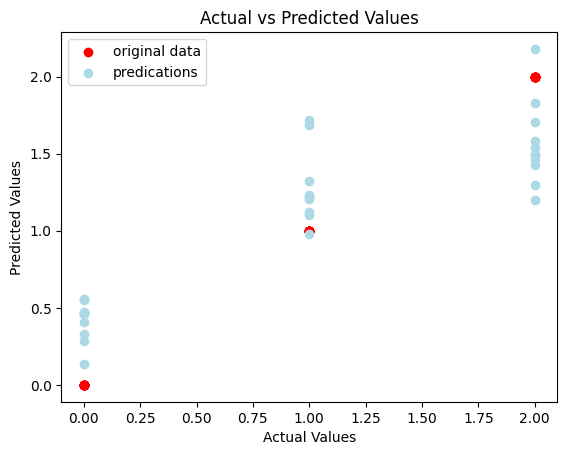

In [ ]:
import matplotlib.pyplot as plt
# Scatter plot for Actual vs Predicted values
plt.scatter(y_test,y_test,color="red",label="original data")
plt.scatter(y_test, predictions.flatten(), color='lightblue', label="predications")
plt.legend()
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def train_and_plot_model(epochs, learning_rate, neurons, batch_size, optimizer, layers, x_train, y_train, x_test, y_test):
    # Construct model based on hyperparameters
    model = build_model(neurons, optimizer, layers)

    # Compile model
    model.compile(
        loss=tf.keras.losses.mae,
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
        metrics=["mae"]
    )

    # Train model
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

    # Evaluate model on test set
    loss, mae = model.evaluate(x_test, y_test, verbose=0)

    # Plot results
    plot_results(history, loss, mae, epochs, learning_rate, neurons, batch_size, optimizer, layers)

def build_model(neurons, optimizer, layers):
    model = tf.keras.Sequential()

    for _ in range(layers):
        model.add(tf.keras.layers.Dense(units=neurons, activation="relu"))
        model.add(tf.keras.layers.Dense(units=1, activation="linear"))

    return model

def plot_results(history, loss, mae, epochs, learning_rate, neurons, batch_size, optimizer, layers):
    # Extract data from history for plotting
    epochs_range = range(1, epochs + 1)
    training_loss = history.history['loss']
    mae_values = history.history['mae']

    # Plot loss over epochs
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, training_loss, label='Training Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot MAE over epochs
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, mae_values, label='Mean Absolute Error')
    plt.title('MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()


Training model_50_0.001_128_2_SGD_1...


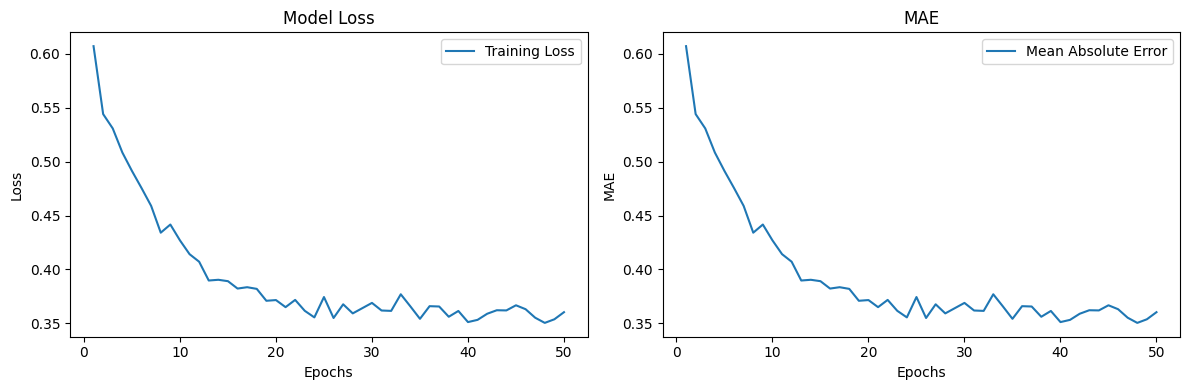

Training model_50_0.001_128_2_SGD_2...


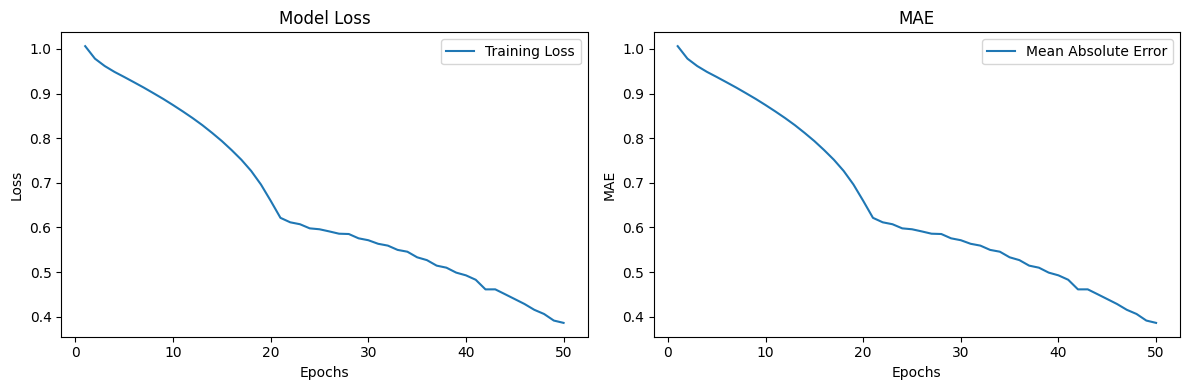

Training model_50_0.001_128_2_SGD_3...


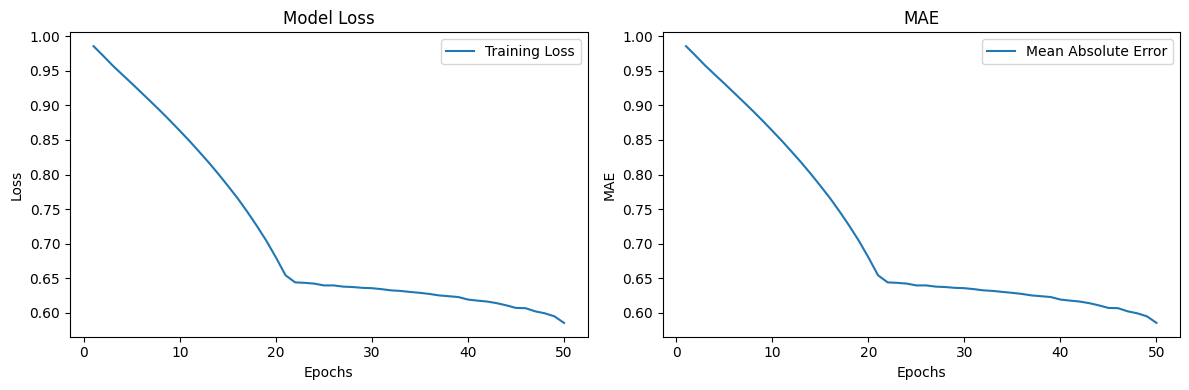

Training model_50_0.001_128_2_Adam_1...


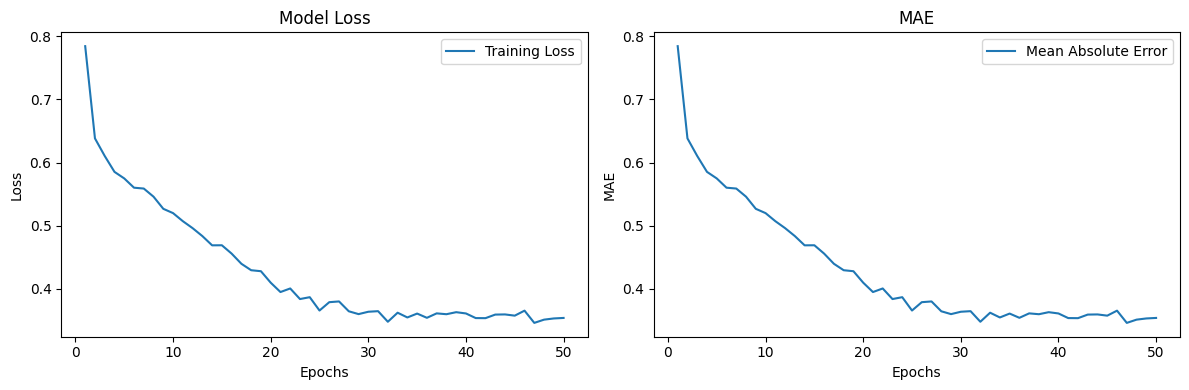

Training model_50_0.001_128_2_Adam_2...


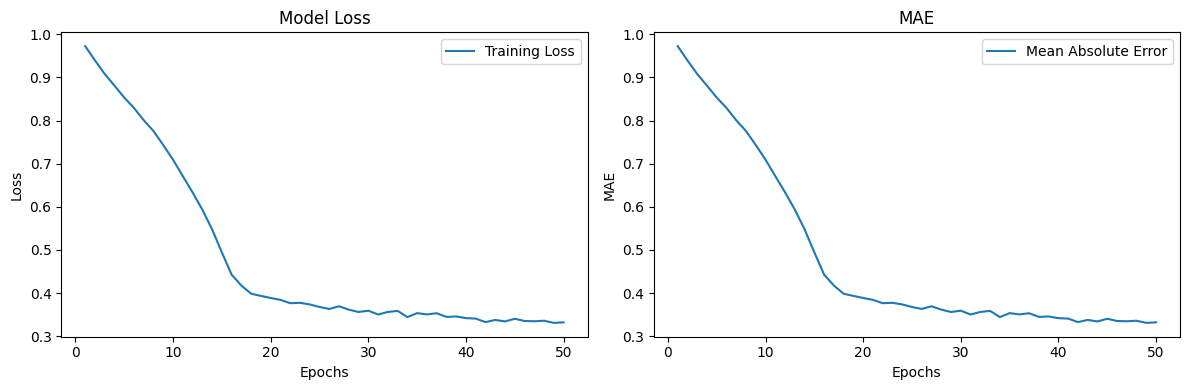

Training model_50_0.001_128_2_Adam_3...


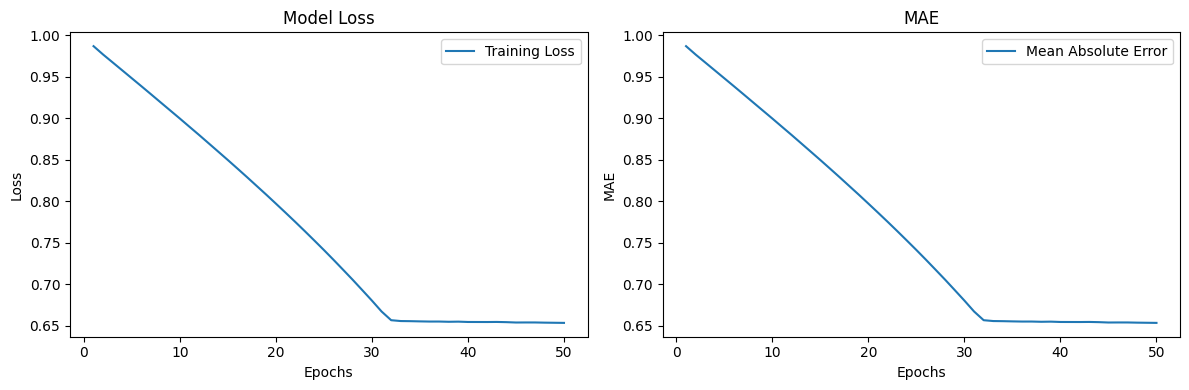

Training model_50_0.001_64_2_SGD_1...


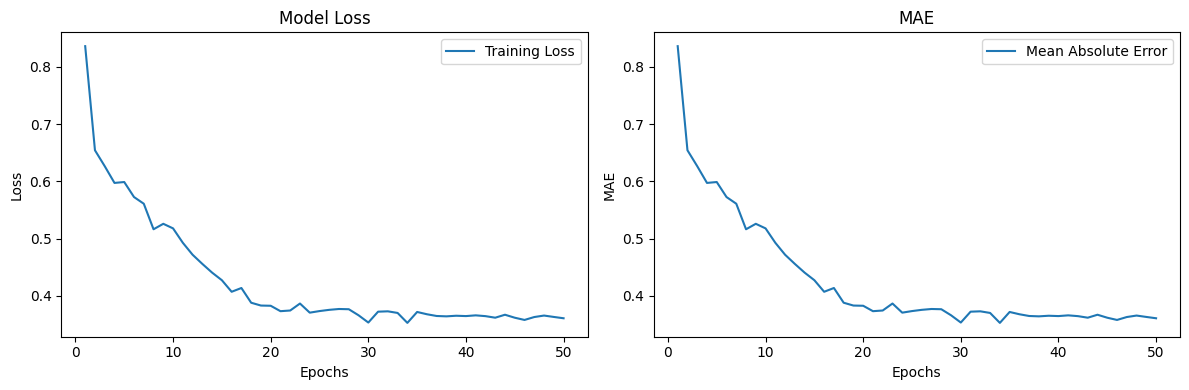

Training model_50_0.001_64_2_SGD_2...


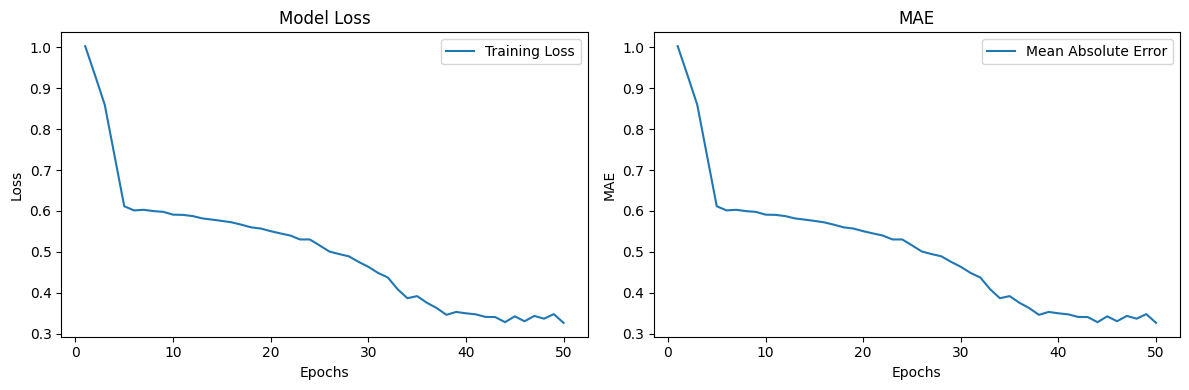

Training model_50_0.001_64_2_SGD_3...


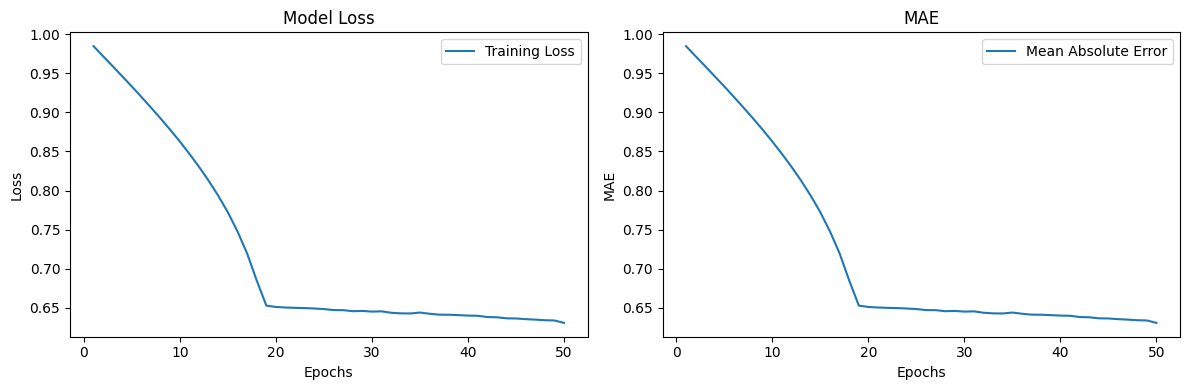

Training model_50_0.001_64_2_Adam_1...


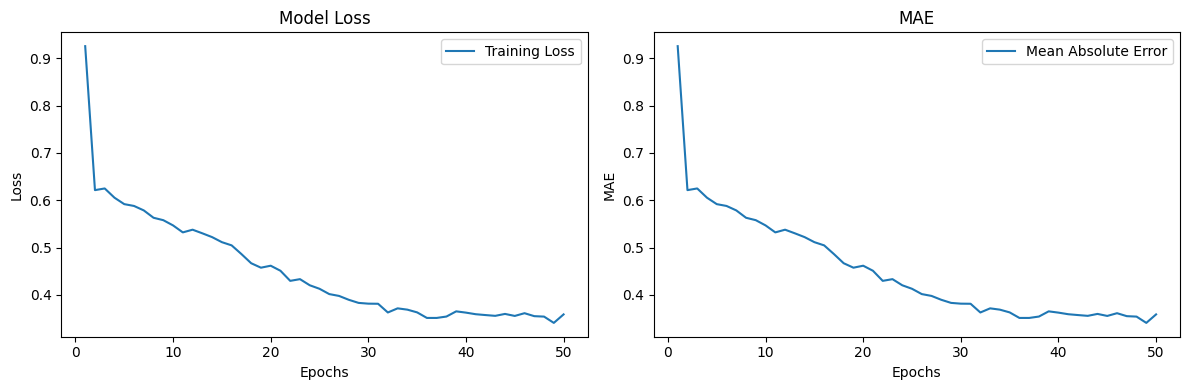

Training model_50_0.001_64_2_Adam_2...


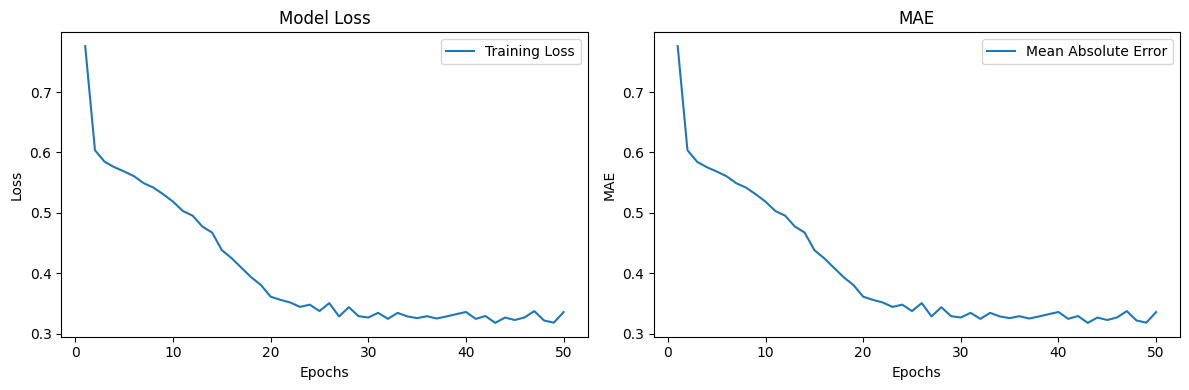

Training model_50_0.001_64_2_Adam_3...


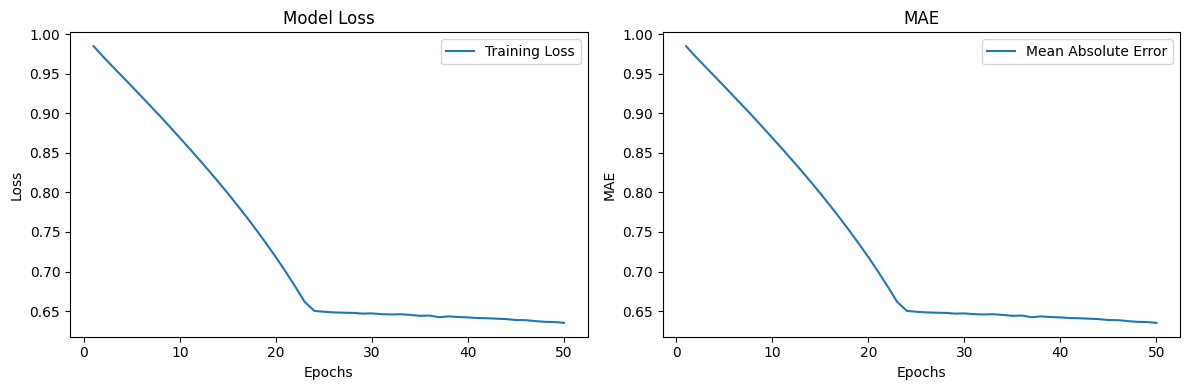

Training model_50_0.01_128_2_SGD_1...


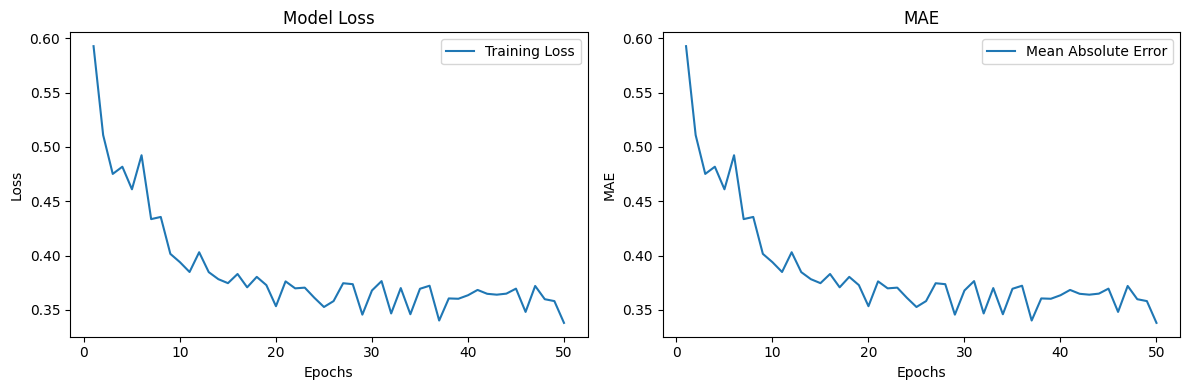

Training model_50_0.01_128_2_SGD_2...


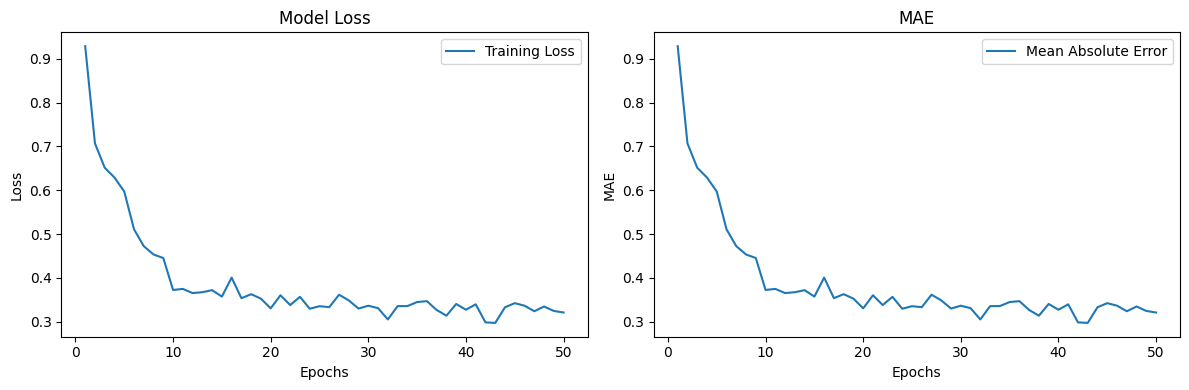

Training model_50_0.01_128_2_SGD_3...


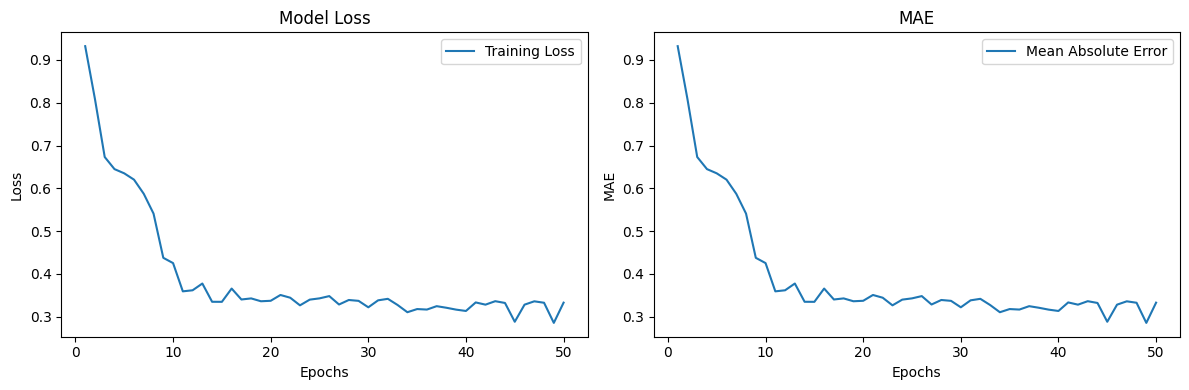

Training model_50_0.01_128_2_Adam_1...


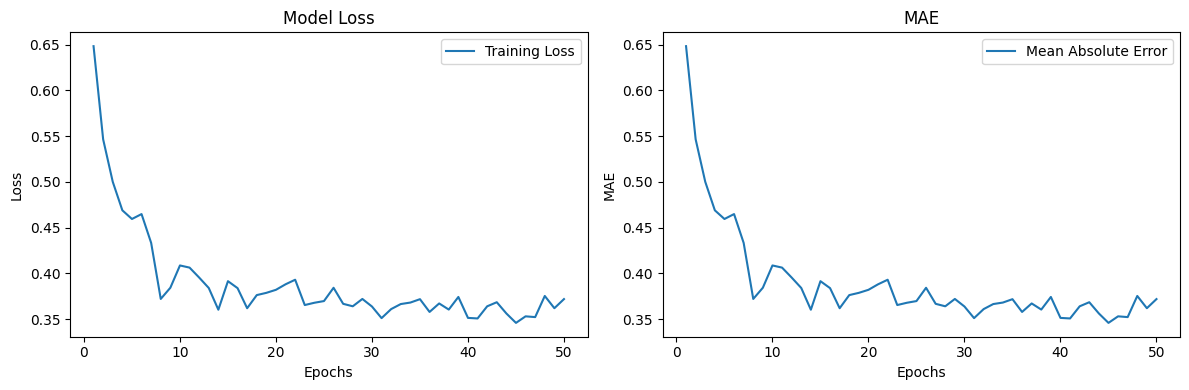

Training model_50_0.01_128_2_Adam_2...


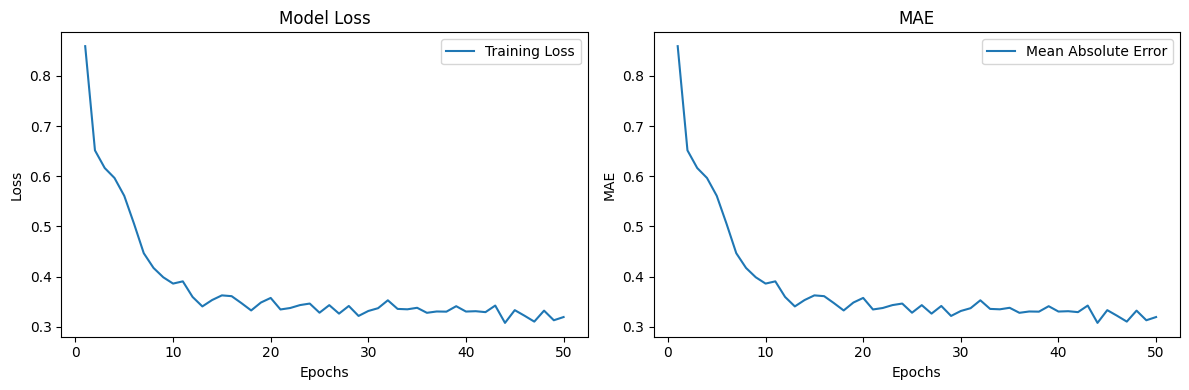

Training model_50_0.01_128_2_Adam_3...


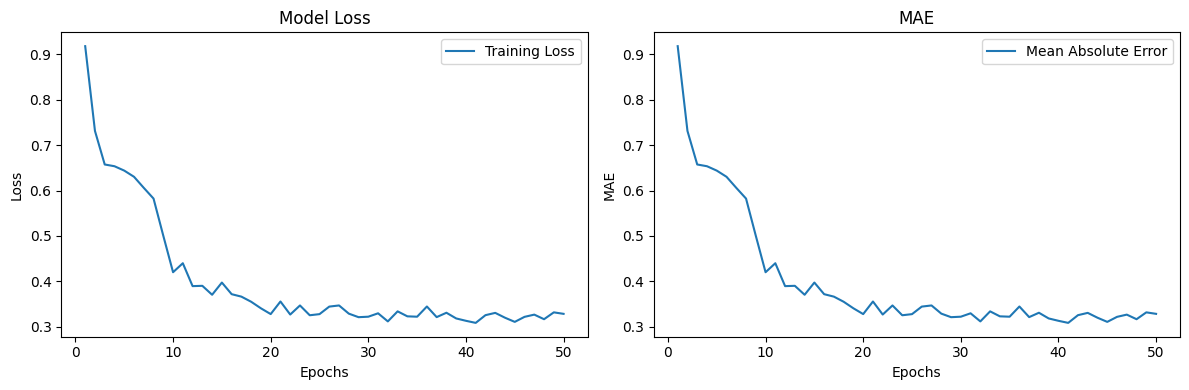

Training model_50_0.01_64_2_SGD_1...


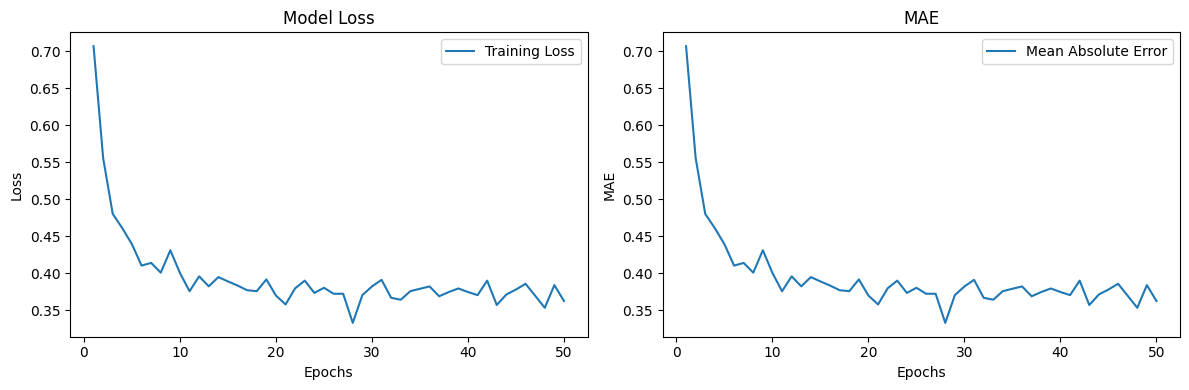

Training model_50_0.01_64_2_SGD_2...


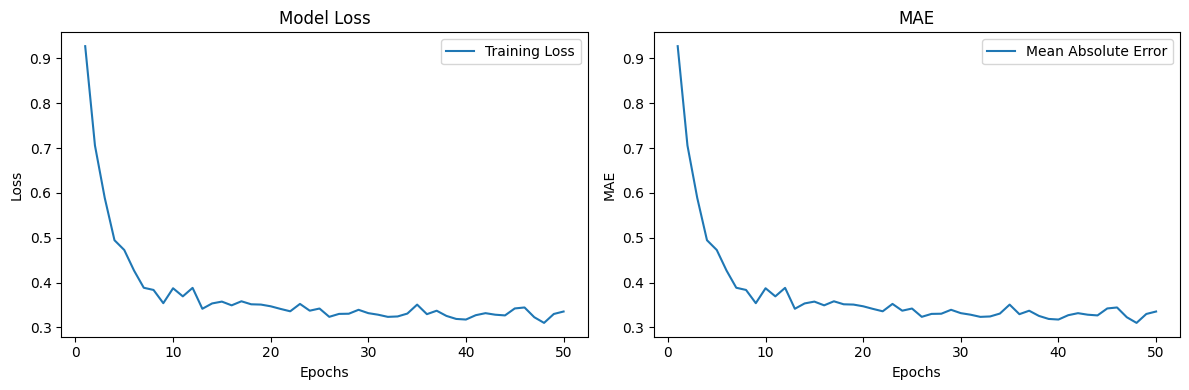

Training model_50_0.01_64_2_SGD_3...


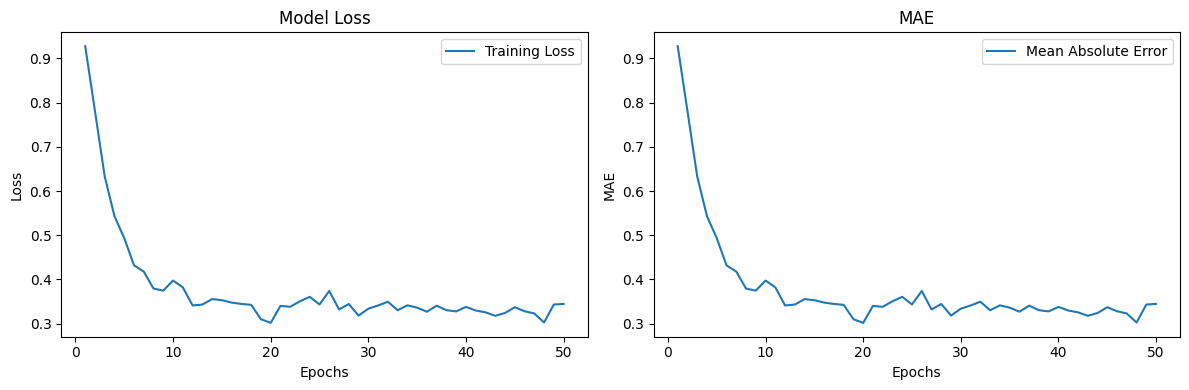

Training model_50_0.01_64_2_Adam_1...


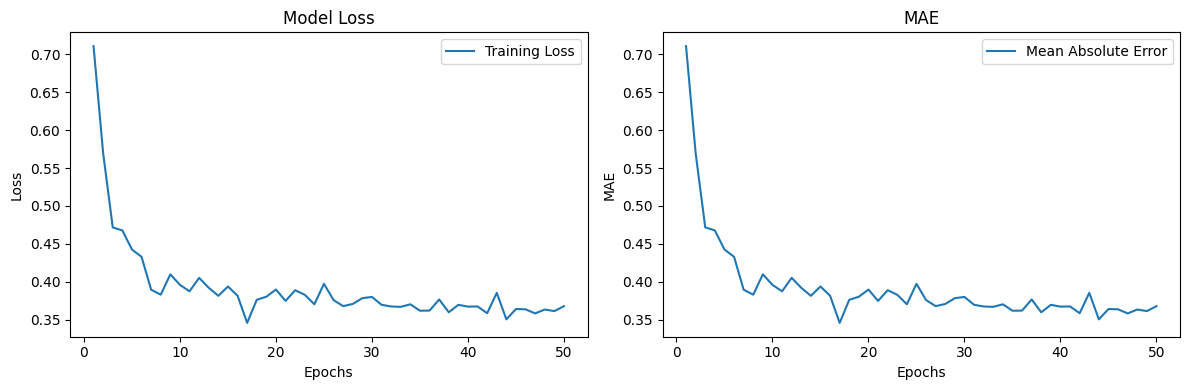

Training model_50_0.01_64_2_Adam_2...


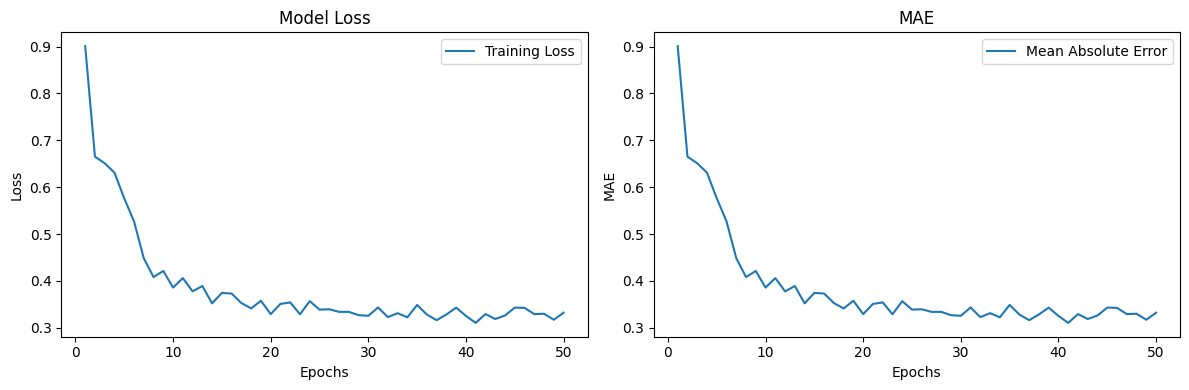

Training model_50_0.01_64_2_Adam_3...


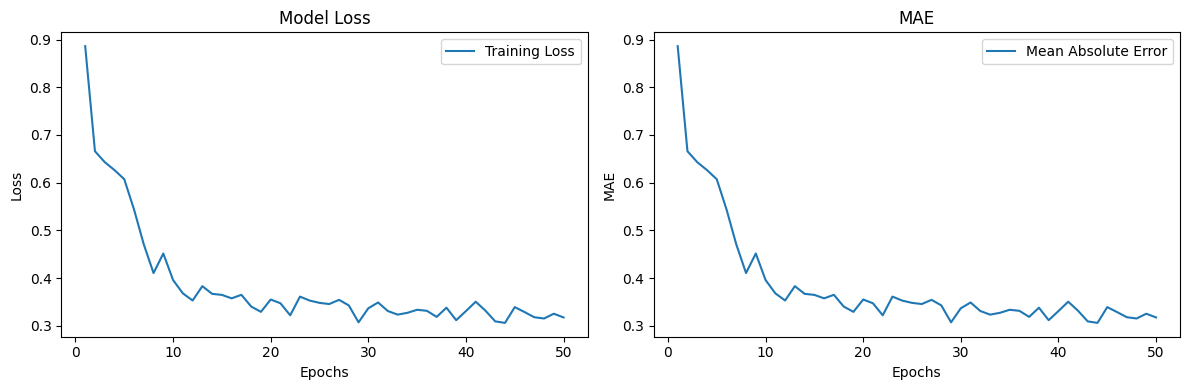

Training model_100_0.001_128_2_SGD_1...


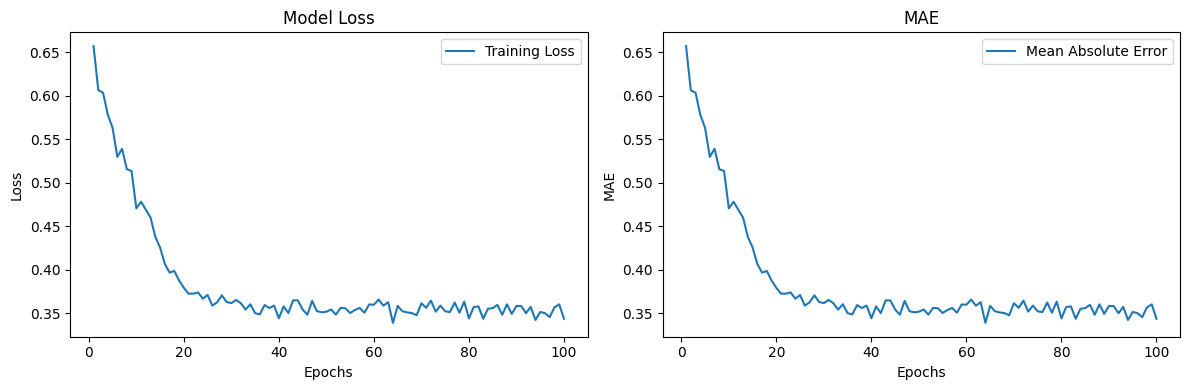

Training model_100_0.001_128_2_SGD_2...


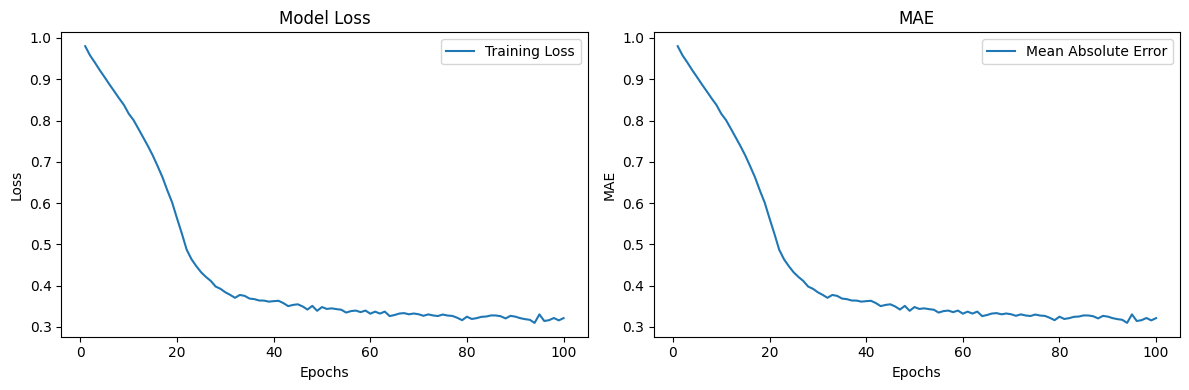

Training model_100_0.001_128_2_SGD_3...


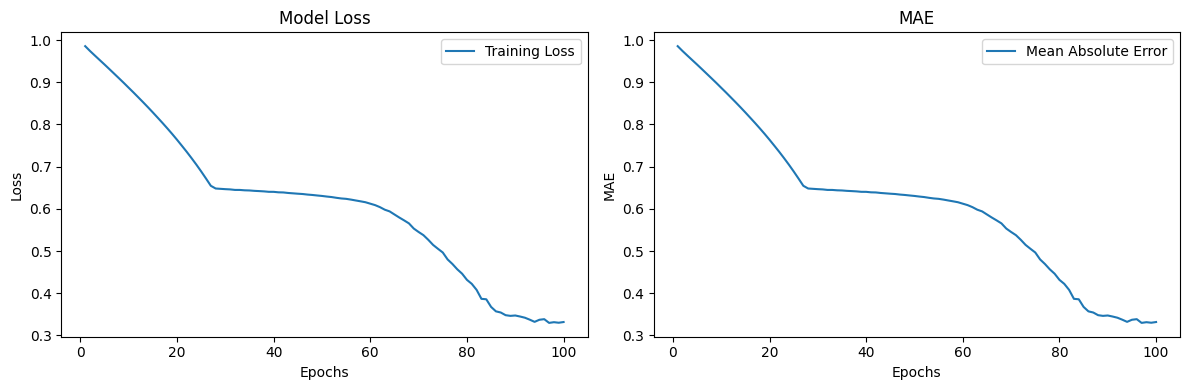

Training model_100_0.001_128_2_Adam_1...


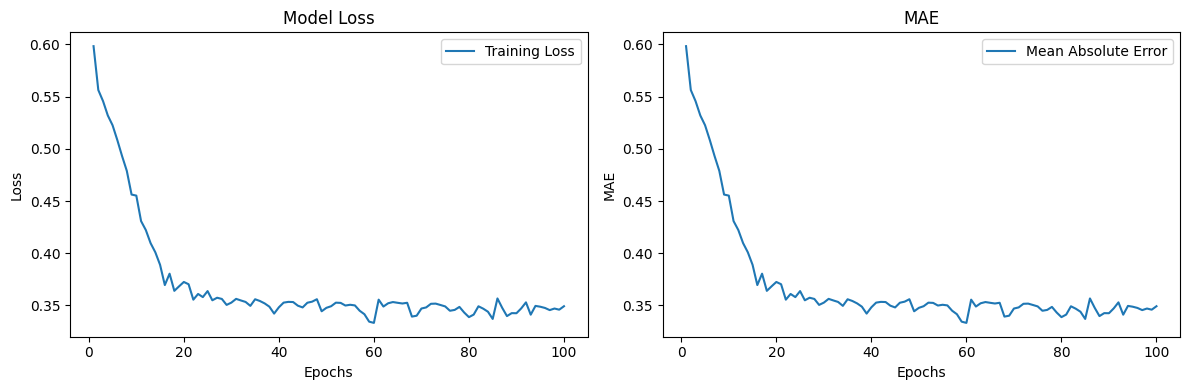

Training model_100_0.001_128_2_Adam_2...


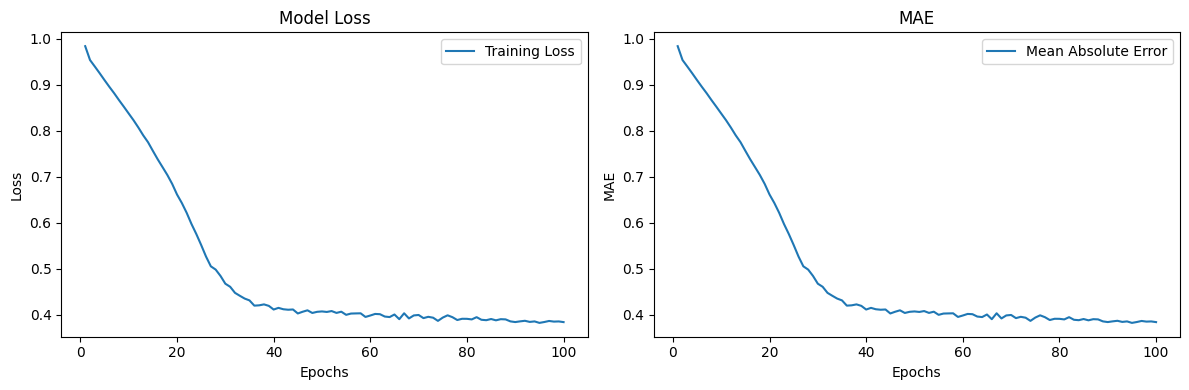

Training model_100_0.001_128_2_Adam_3...


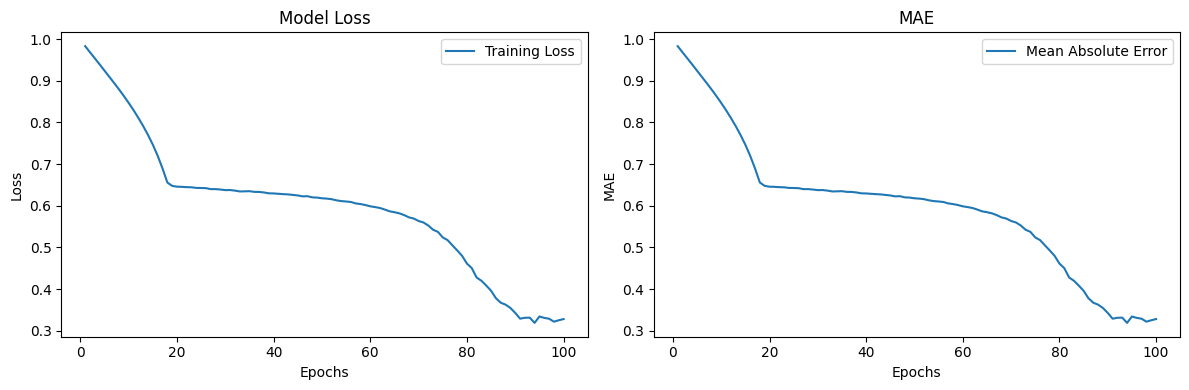

Training model_100_0.001_64_2_SGD_1...


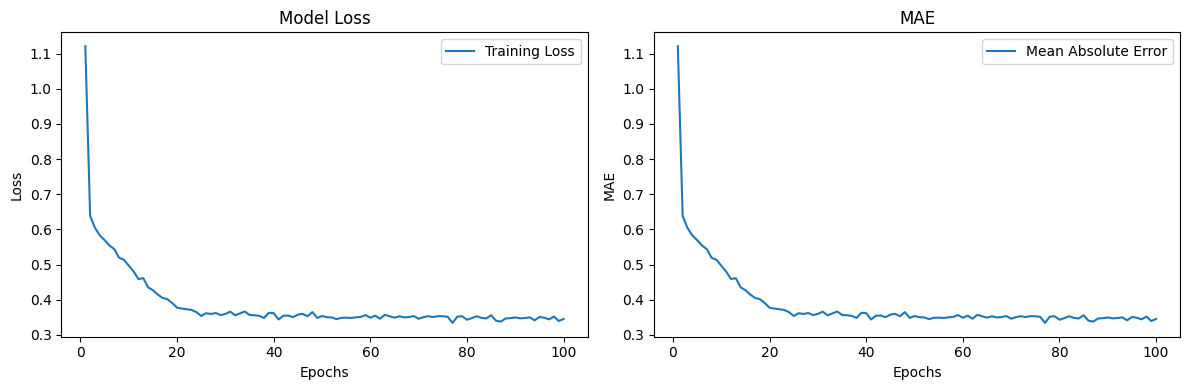

Training model_100_0.001_64_2_SGD_2...


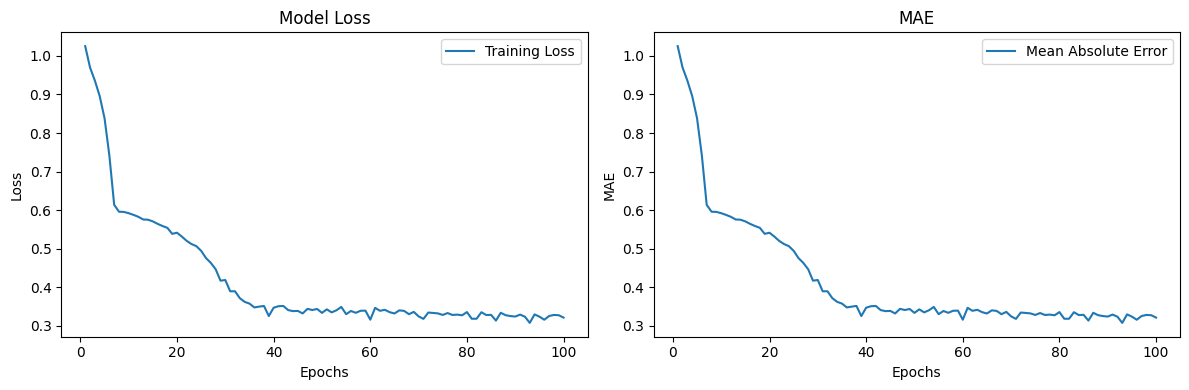

Training model_100_0.001_64_2_SGD_3...


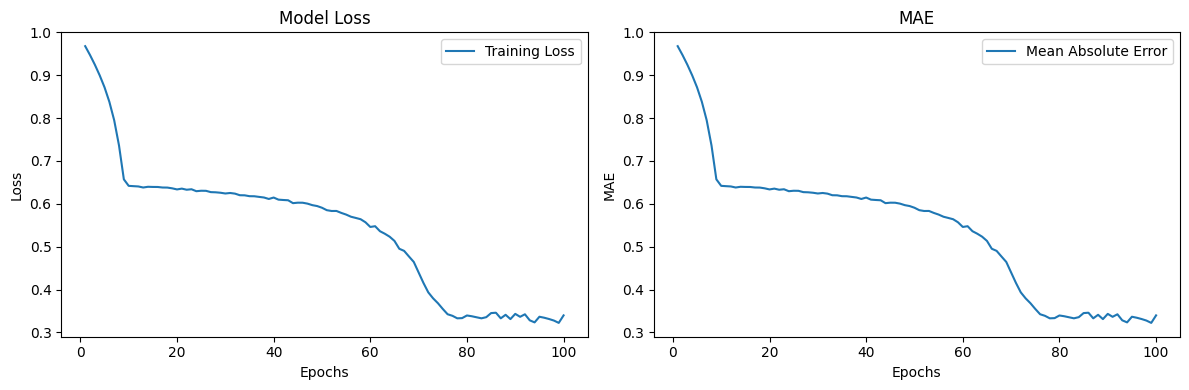

Training model_100_0.001_64_2_Adam_1...


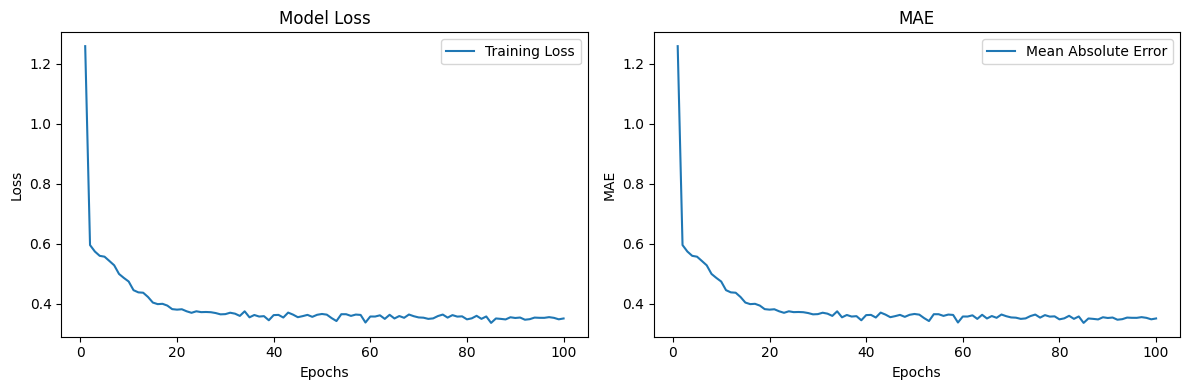

Training model_100_0.001_64_2_Adam_2...


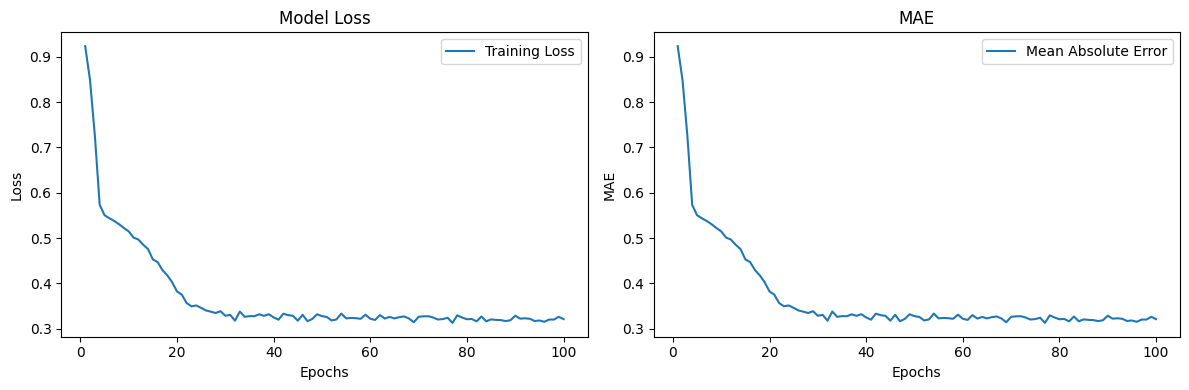

Training model_100_0.001_64_2_Adam_3...


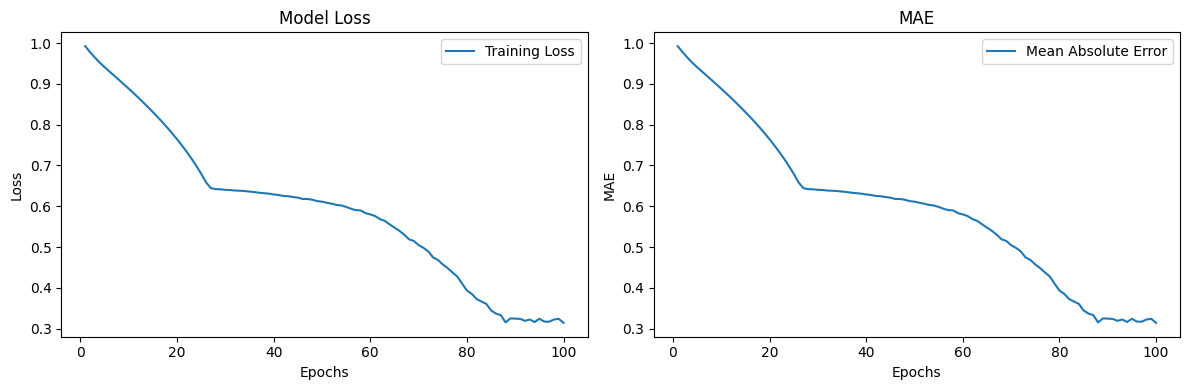

Training model_100_0.01_128_2_SGD_1...


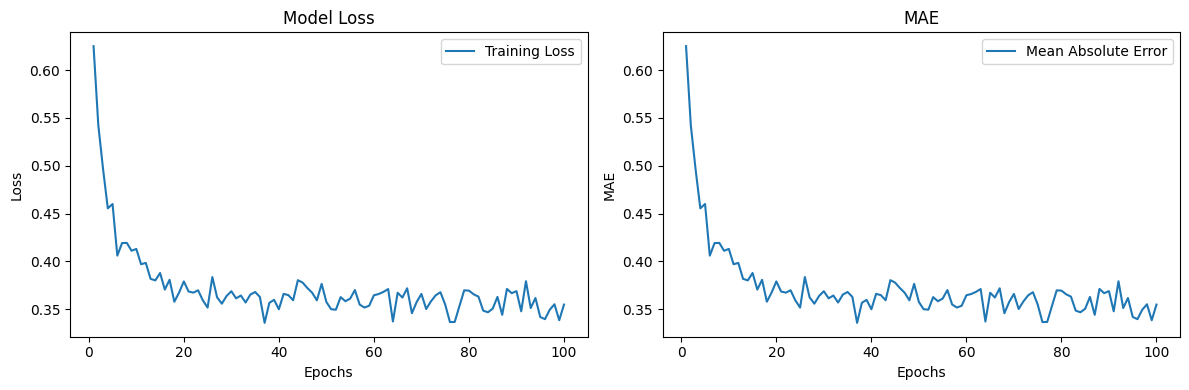

Training model_100_0.01_128_2_SGD_2...


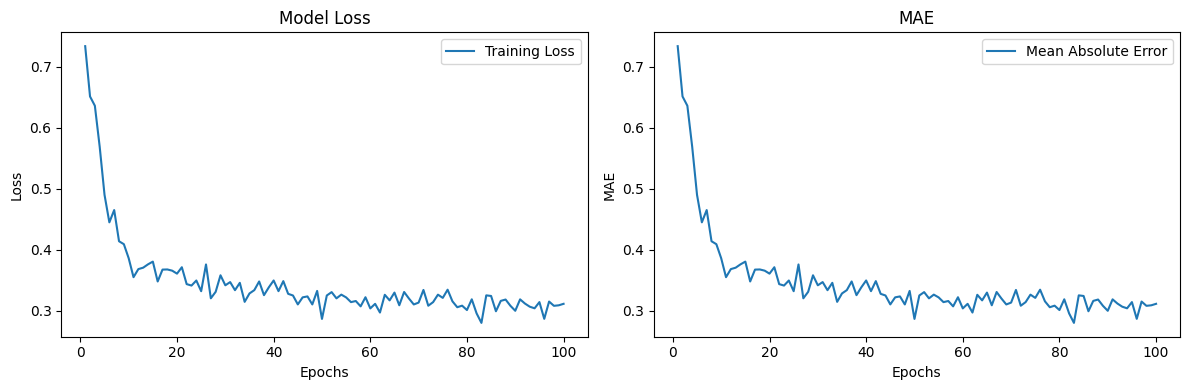

Training model_100_0.01_128_2_SGD_3...


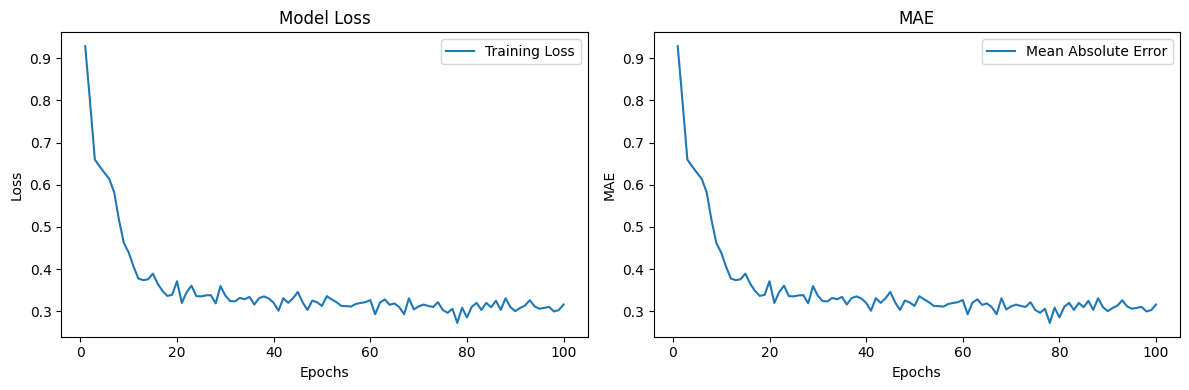

Training model_100_0.01_128_2_Adam_1...


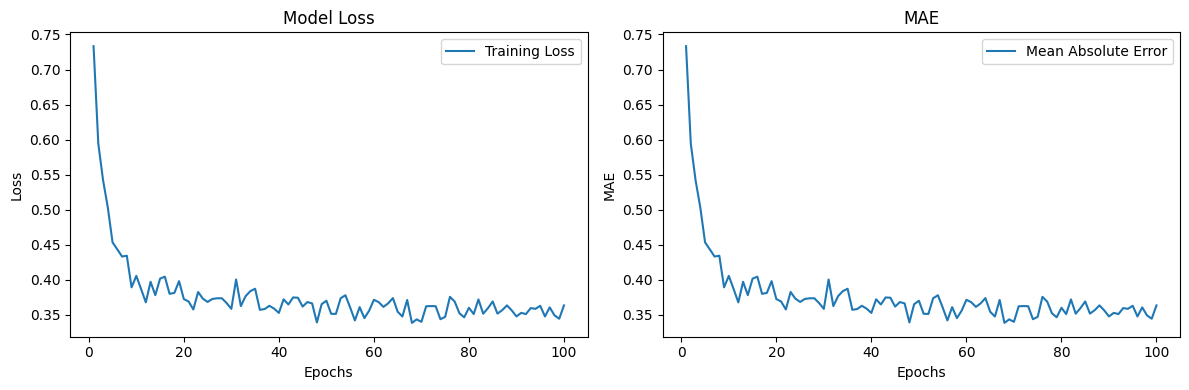

Training model_100_0.01_128_2_Adam_2...


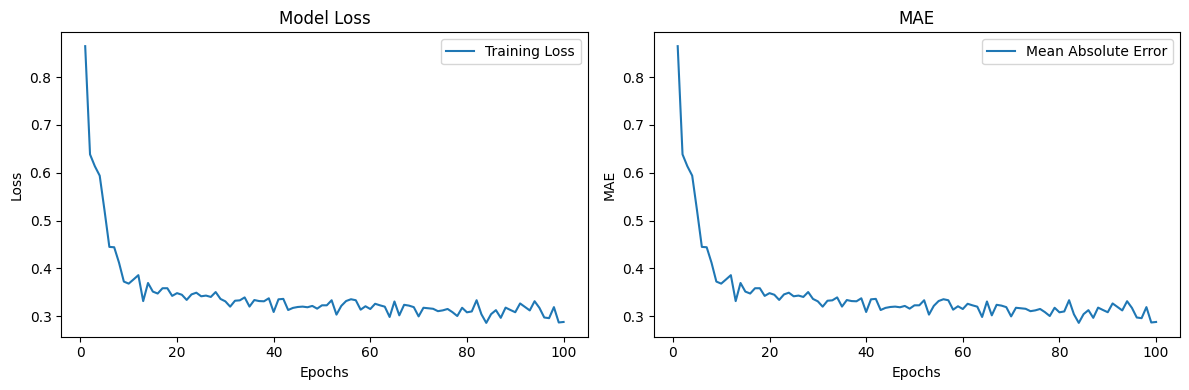

Training model_100_0.01_128_2_Adam_3...


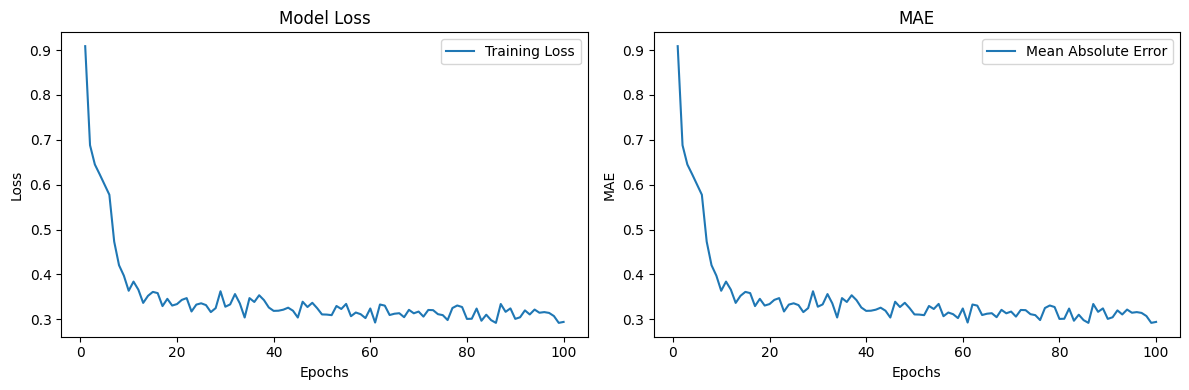

Training model_100_0.01_64_2_SGD_1...


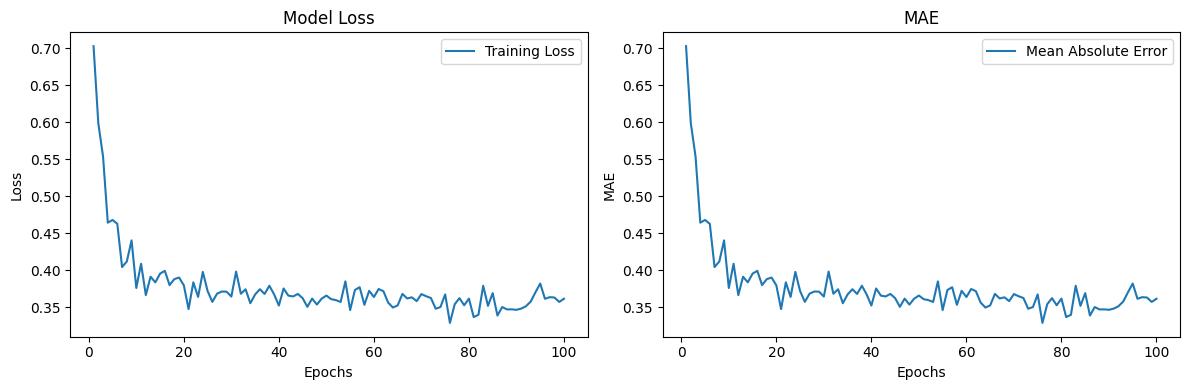

Training model_100_0.01_64_2_SGD_2...


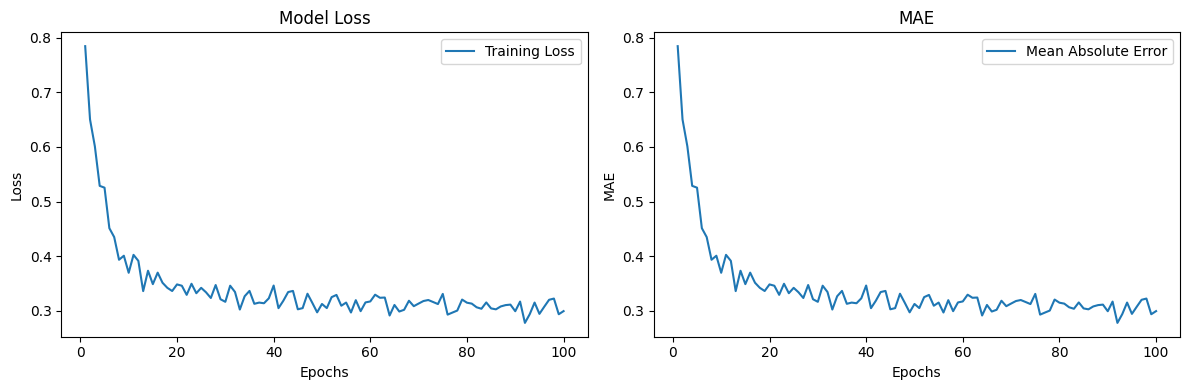

Training model_100_0.01_64_2_SGD_3...


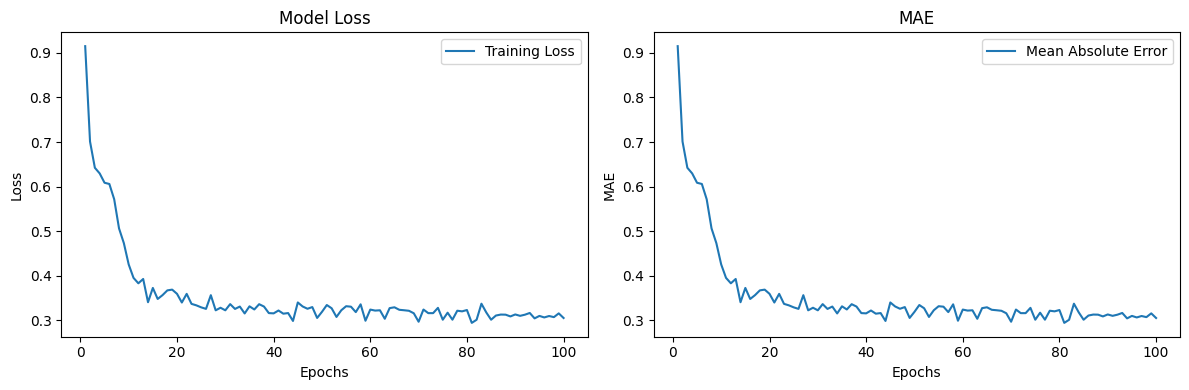

Training model_100_0.01_64_2_Adam_1...


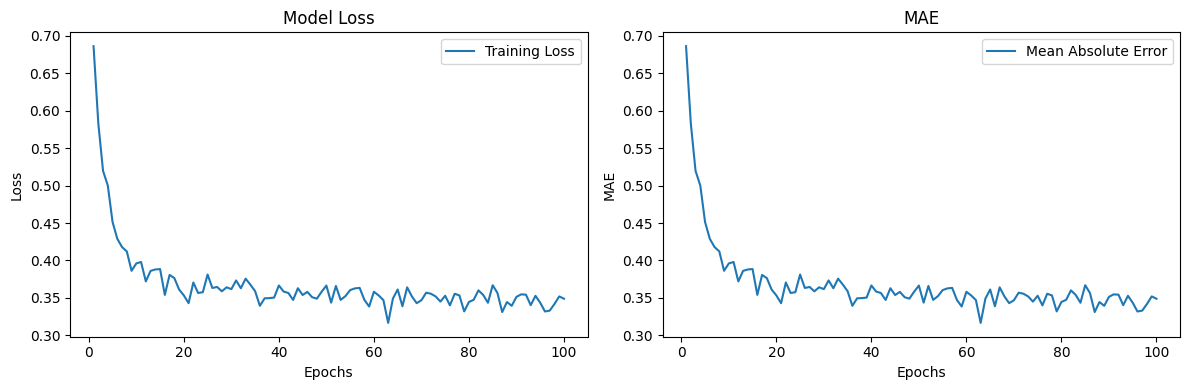

Training model_100_0.01_64_2_Adam_2...


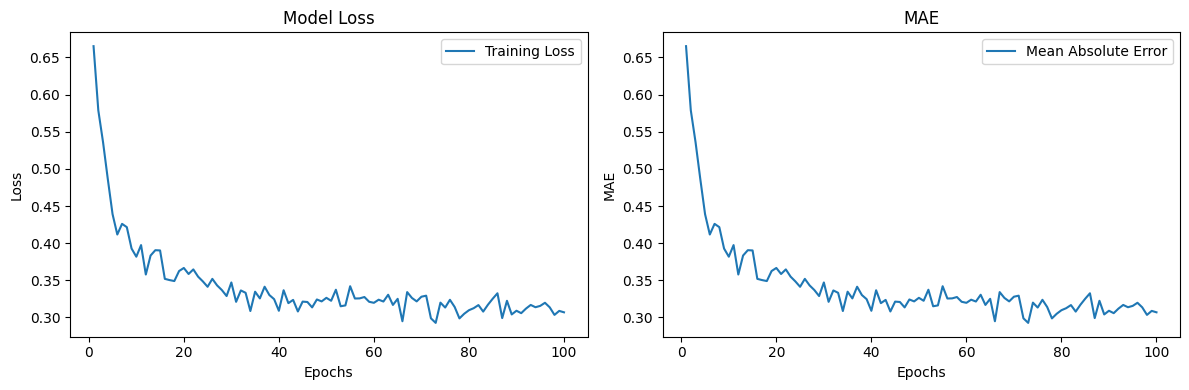

Training model_100_0.01_64_2_Adam_3...


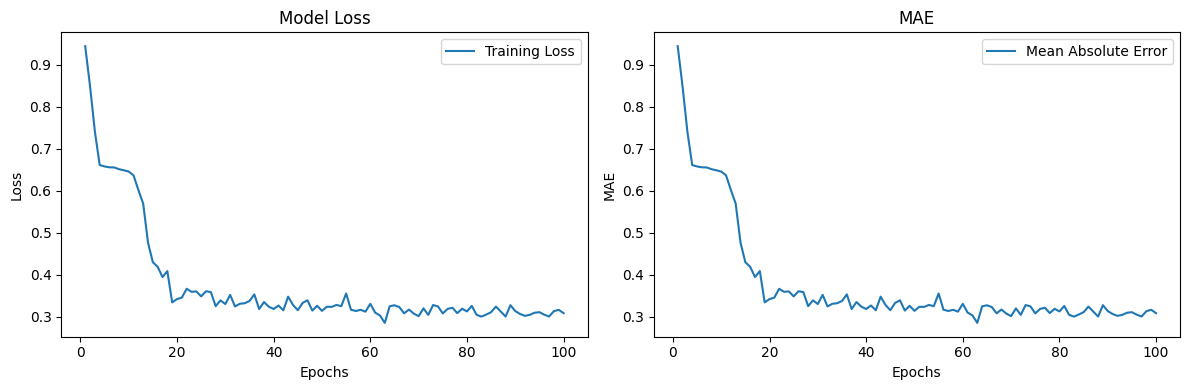

In [ ]:
epochs_values = [50, 100]
learning_rate_values = [0.001, 0.01]
neurons_values = [128, 64]
batch_size_values = [2]
optimizer_values = ["SGD", "Adam"]
layers_values = [1, 2, 3]

for epochs in epochs_values:
    for learning_rate in learning_rate_values:
        for neurons in neurons_values:
            for batch_size in batch_size_values:
                for optimizer in optimizer_values:
                    for layers in layers_values:
                        model_name = f"model_{epochs}_{learning_rate}_{neurons}_{batch_size}_{optimizer}_{layers}"
                        print(f"Training {model_name}...")
                        train_and_plot_model(epochs, learning_rate, neurons, batch_size, optimizer, layers, X_train, y_train, X_test, y_test)


# End